# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

C:\Users\Classy\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

C:\Users\Classy\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [6]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [7]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

### Question #1

In [8]:
#Load DataFrame
world_bank_DataFrame = pd.read_json('data/world_bank_projects.json')
#Check column names and completeness
world_bank_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   sector                    500 non-null    object
 1   supplementprojectflg      498 non-null    object
 2   projectfinancialtype      500 non-null    object
 3   prodline                  500 non-null    object
 4   mjtheme                   491 non-null    object
 5   idacommamt                500 non-null    int64 
 6   impagency                 472 non-null    object
 7   project_name              500 non-null    object
 8   mjthemecode               500 non-null    object
 9   closingdate               370 non-null    object
 10  totalcommamt              500 non-null    int64 
 11  id                        500 non-null    object
 12  mjsector_namecode         500 non-null    object
 13  docty                     446 non-null    object
 14  sector1                   

In [9]:
#Create Series of count of projects per country
project_count = world_bank_DataFrame.groupby('countryname').count().id
#Sort count in descending order
project_count_sorted = project_count.sort_values(ascending=False)
#Print top 15 countries to check verify results and check for ties at #10
print(project_count_sorted.head(15))

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Burkina Faso                        9
Federative Republic of Brazil       9
Islamic Republic of Pakistan        9
United Republic of Tanzania         8
Republic of Tajikistan              8
Name: id, dtype: int64


In [10]:
#Africa is not a country
project_count_sorted.drop('Africa', inplace=True)
#With Africa removed, 10th place is a 3-way tie. Print top 12 countries.
print(project_count_sorted.head(12))

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Republic of Mozambique             11
Burkina Faso                        9
Federative Republic of Brazil       9
Islamic Republic of Pakistan        9
Name: id, dtype: int64


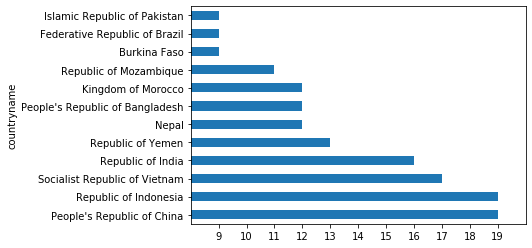

In [11]:
project_count_sorted[0:12].plot(kind = 'barh', xlim=(8,20), xticks=[9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

### Question #2

In [12]:
with open('data/world_bank_projects.json', 'r') as json_file:
    world_bank_dict = json.load(json_file)

project_themes = json_normalize(world_bank_dict, 'mjtheme_namecode')

print(project_themes.shape)
print(project_themes.head())

(1499, 2)
  code                                   name
0    8                      Human development
1   11                                       
2    1                    Economic management
3    6  Social protection and risk management
4    5                  Trade and integration


C:\Users\Classy\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


In [13]:
#Produce list showing the prevalence of various project theme codes
top_codes = project_themes.groupby('code').count().sort_values(by='name', ascending=False)
#Print list including sum to verify all instances were counted
print(top_codes)
print('Sum: ', top_codes['name'].sum())

      name
code      
11     250
10     216
8      210
2      199
6      168
4      146
7      130
5       77
9       50
1       38
3       15
Sum:  1499


### Question #3

In [14]:
#Initialize dictionary of codes and their corresponding descriptions
code_name_dict = {}
#Iterate over project theme DataFrame to add non-missing descriptions to the code description dictionary
for index, row in project_themes.iterrows():
    if row['name'] != '':
        code_name_dict[row['code']] = row['name']
#Print dictionary to check for completeness
print(code_name_dict)
    


{'8': 'Human development', '1': 'Economic management', '6': 'Social protection and risk management', '5': 'Trade and integration', '2': 'Public sector governance', '11': 'Environment and natural resources management', '7': 'Social dev/gender/inclusion', '4': 'Financial and private sector development', '10': 'Rural development', '9': 'Urban development', '3': 'Rule of law'}


In [15]:
#Initialize copy of project themes DataFrame to be filled in
project_themes_filled = project_themes.copy()
#Iterating over new DataFrame, writing value string to 'name' column from corresponding 'code' key in dictionary
for index, row in project_themes_filled.iterrows():
    row['name'] = code_name_dict[row['code']]

#Print info to verify 1499 entries in each column
print(project_themes_filled.info())
#Print example of new DataFrame
print(project_themes_filled.head(25))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   code    1499 non-null   object
 1   name    1499 non-null   object
dtypes: object(2)
memory usage: 23.5+ KB
None
   code                                          name
0     8                             Human development
1    11  Environment and natural resources management
2     1                           Economic management
3     6         Social protection and risk management
4     5                         Trade and integration
5     2                      Public sector governance
6    11  Environment and natural resources management
7     6         Social protection and risk management
8     7                   Social dev/gender/inclusion
9     7                   Social dev/gender/inclusion
10    5                         Trade and integration
11    4      Financial and private sector development
12